# Intoduction to scikit-learn

0. end to end scikitlearn
1. getting the data ready
2. choose the right estimate/algorithm for our problems
3. fit the model /algorithm for our problems
4. evaluating a model
5. improve a model
6. save and load a trained model
7. putting it all together

In [1]:
import numpy as np

In [2]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 0 end to end scikit learn workflow

In [3]:
# 1 getting the data ready

import pandas as pd
heart_disease = pd.read_csv("heart-diseasenew.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#create x(features matrix)

x=heart_disease.drop("target", axis=1) #only droping the target section and including the others

y=heart_disease["target"]


In [5]:
#To avoid the recolour errors
#import warnings
#warnings.filterwarnings("ignore")

In [6]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.8 (main, Nov 24 2022, 08:09:04) [Clang 14.0.6 ]
executable: /Users/macbookair/Desktop/sample_project/env/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
      sklearn: 1.1.3
          pip: 22.3.1
   setuptools: 65.5.0
        numpy: 1.23.5
        scipy: 1.9.3
       Cython: None
       pandas: 1.5.2
   matplotlib: 3.6.2
       joblib: 1.1.1
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/macbookair/Desktop/sample_project/env/lib/libmkl_rt.1.dylib
         prefix: libmkl_rt
       user_api: blas
   internal_api: mkl
        version: 2021.4-Product
    num_threads: 2
threading_layer: intel

       filepath: /Users/macbookair/Desktop/sample_project/env/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 4


In [7]:
# 2 . choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# we'll keep the default hyperparameters
#clf.get_params()

In [8]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
clf.fit(x_train,y_train);

In [10]:
# make a prediction
y_label=clf.predict(np.array([0,2,3,4]))

/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2


In [12]:
y_preds=clf.predict(x_test)
y_preds

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [13]:
y_test

124    1
36     1
204    0
107    1
246    0
      ..
296    0
4      1
291    0
53     1
275    0
Name: target, Length: 61, dtype: int64

In [14]:
#4. Evaluate the model on the training data and test data
clf.score(x_train,y_train)

1.0

In [15]:
clf.score(x_test,y_test)

0.8360655737704918

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.80      0.94      0.86        34

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61



In [17]:
confusion_matrix(y_test,y_preds)

array([[19,  8],
       [ 2, 32]])

In [18]:
accuracy_score(y_test,y_preds)

0.8360655737704918

In [19]:
# 5 improve a model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with{i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on the test set : {clf.score(x_test,y_test) * 100:.2f}")
    print(" ")

trying model with10 estimators...
model accuracy on the test set : 80.33
 
trying model with20 estimators...
model accuracy on the test set : 85.25
 
trying model with30 estimators...
model accuracy on the test set : 81.97
 
trying model with40 estimators...
model accuracy on the test set : 85.25
 
trying model with50 estimators...
model accuracy on the test set : 78.69
 
trying model with60 estimators...
model accuracy on the test set : 81.97
 
trying model with70 estimators...
model accuracy on the test set : 83.61
 
trying model with80 estimators...
model accuracy on the test set : 81.97
 
trying model with90 estimators...
model accuracy on the test set : 83.61
 


In [20]:
#6 save a model and load it
import pickle

pickle.dump(clf,open("random_forst_model_1.pk1","wb"))

In [21]:
loaded_model = pickle.load(open("random_forst_model_1.pk1","rb"))
loaded_model.score(x_test,y_test)

0.8360655737704918

## 1 getting our data ready to be used with machine learning

Three main main things we have to do

1. split the data into features and labels(usually x and y)
2. fillling or disgrading missing values
3. converting non numerical values to numerical values (also called as d feature encoding)

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
x=heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# split the data into training and test test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,
                                                y,
                                                test_size=0.2)#test_size=0.2 is the percentage for test is 20%

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
x.shape

(303, 13)

In [28]:
x.shape[0]*0.8 #80% of the data

242.4

In [29]:
303-242


61

In [30]:
#61 data is used in training

# 1.1 Make sure it's all numerical


In [31]:
car_sales=pd.read_csv("car-sales-extended.csv")

In [32]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [34]:
len(car_sales)

1000

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [213]:
# split the data into x and y

x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#split into training ang test
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2)

In [214]:
x


,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [37]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_train)

ValueError: could not convert string to float: 'Toyota'

In [211]:
#changing the string data columns to numbers because string are not allowed in scikit learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                               categorical_features)],
                             remainder="passthrough")

transformed_x=transformer.fit_transform(x)
transformed_x

<950x16 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [39]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [40]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [41]:
dummies= pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [42]:
#Lets refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,
                                                            y,
                                                            test_size=0.2)

model.fit(x_train,y_train)

RandomForestRegressor()

In [43]:
model.score(x_test,y_test)

0.3235867221569877

## what if there were missing values?

1. fill them with some (also known as imputation)
2. remove the samples with missing data altogether

In [44]:
# import car missing data

car_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_missing.head(50)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [45]:
# to know how many missing values are 
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
#create x and y
x=car_missing.drop("Price", axis=1)

y=car_missing["Price"]

In [47]:
#fill the "make" column

car_missing["Make"].fillna("missing", inplace=True)

# fill the "colour" column

car_missing["Colour"].fillna("missing", inplace=True)

# fill the "Odometer (KM)" column

car_missing["Odometer (KM)"].fillna(car_missing["Odometer (KM)"].mean(), inplace=True)

# fill the "doors" column

car_missing["Doors"].fillna(4, inplace=True)

In [48]:
# checking the dataframe after filling the miaaing values
car_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [49]:
# remove rows with missing price values
car_missing.dropna(inplace=True)

In [50]:
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [51]:
len(car_missing)

950

# we have removed the 50 rows which do't have the price

In [52]:
x=car_missing.drop("Price", axis=1)
y=car_missing["Price"]

# data into number(means converting he words to number)

In [53]:
#lets try our data into number(means converting he words to number)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                             remainder="passthrough")
transformed_x=transformer.fit_transform(car_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## option 2 fill the missing values with scikit-learn

In [54]:
car_sale_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sale_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [55]:
car_sale_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
#drop the rows with no lables
car_sale_missing.dropna(subset=["Price"],inplace=True)
car_sale_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [215]:
#split into x & y
x=car_sale_missing.drop("Price",axis=1)
y=car_sale_missing["Price"]

 # fill the missing values with scikit-learn

In [58]:
# fill the missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and 'numerical' value with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#create an imputer (something that fills missing date)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])


#transform the data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [59]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [60]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [61]:
#lets try our data into number(means converting he words to number)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                             remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [62]:
# now we have got our data as number and filled (no missing values)
# lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformed_x,
                                               y,
                                               test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

In [63]:
len(car_missing),len(car_sales)

(950, 1000)

## Choosing the right estimator/algorithm for your problem
some things to note;

1. sklearn refers to machine learning models,algorithms as estimators.
2. classification problem-predicting the category(heart disease or not)
      sometimes you'll see 'clf'(short for classifier) used as a classification estimator
3. regression problem-predicting a number(selling price of a car)

if you're working on a machine learning problem and looking to use sklearn and not sure what model you should use,
refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 picking a machine learning model for a regression model

let use the california housing dataset (the data is taken from the internet sklearn documentation

In [64]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [65]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [66]:
housing_df["MedHouseVal"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [67]:
housing_df["target"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [68]:
housing_df=housing_df.drop("MedHouseVal",axis=1)

In [69]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Regression model

In [70]:
#import algorithm/estimators
#go and check the diagram

from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#create the data
x=housing_df.drop("target",axis=1)

y=housing_df["target"] #median house price in $100,000s

#split into train & test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model(on the training set)
model=Ridge()
model.fit(x_train,y_train)

#check the score of the model(on the test set)
model.score(x_test,y_test)


0.5758549611440125

what if Ridge didn't work or the score didn't fit our needs?

well,we could always try a different model...

how about we try an ensemble model(an ensemble is combination of smaller models to try and make better prediction than just a single model)?
sklearn ensemble models:

In [71]:
#import the RandomForestRegressor model class from the ensemble module

from sklearn.ensemble import RandomForestRegressor

#setup the random seed
np.random.seed(42)

#create the data

x=housing_df.drop("target",axis=1)

y=housing_df["target"]

#split into train and test

x_train,x_test,y_train,y_test=train_test_split(x,
                                                y,
                                                test_size=0.2)

#create random forest model

model=RandomForestRegressor()
model.fit(x_train,y_train)

#check the score of the model(on the test set)

model.score(x_test,y_test)

0.8066196804802649

In [72]:
# Trying my self regression (lasso)

from sklearn import linear_model

#setup the random seed
np.random.seed(42)

#create the data

x=housing_df.drop("target",axis=1)

y=housing_df["target"]

#split into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#create random forest model

clf = linear_model.Lasso()

clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.2841671821008396

In [73]:
# Trying by myself(sgdregressor)
from sklearn.linear_model import SGDRegressor

#setup the random seed
np.random.seed(42)

#create the data
x=housing_df.drop("target",axis=1)

y=housing_df["target"]

#split into train & test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#create sgdregressor model

model=SGDRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

-1.521247412968053e+28

# 2.2 choosing the estimator for a classification problem
see the diagram

In [74]:
heart_disease=pd.read_csv("heart-diseasenew.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
len(heart_disease)

303

# consulting the map and it say to try LinearSVC

In [76]:
#import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#setup the random seed
np.random.seed(42)

#make the data
x=heart_disease.drop("target",axis=1)

y=heart_disease["target"]

#split the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [77]:
#import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup the random seed
np.random.seed(42)

#make the data
x=heart_disease.drop("target",axis=1)

y=heart_disease["target"]

#split the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

Information

1. if you have structures data(heart disease it has a tabular and label data) use the ensemble methods
2. if you have unstructured data use the deep learning or transfer learning

## fit the model /algorithm on our data and use it to make predictions

 # 3.1 fitting the model to the data
 
 different names for:
 * x=features,features variable,data
 * y=lables,targets,targets variables

In [78]:
#import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup the random seed
np.random.seed(42)

#make the data
x=heart_disease.drop("target",axis=1)

y=heart_disease["target"]

#split the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier()
#fit the model to the data(training the machine learning model)
clf.fit(x_train,y_train)
#evaluate the randomforestclassifier(use the patterns the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

In [79]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [80]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [81]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## 3.2 make prediction using the machine learning model

doing every thing from starting point

2 ways to make predictions:

1) predict()
2) predict_proba()

In [83]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [84]:
# Use a trained model to make predictions
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [85]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [86]:
# compare predictions to truth lables to evaluate the model
y_preds=clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [87]:
clf.score(x_test,y_test)

0.8524590163934426

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

 Make prediction with predict_proba()


In [89]:
#predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [90]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [91]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [92]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

'Predict()' can also be used for regression models.


In [93]:
housing_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [94]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#split the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#create the model instance
model=RandomForestRegressor()

#fit the model to the data
model.fit(x_train,y_train)

#make predictions
y_preds=model.predict(x_test)


In [95]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [96]:
np.array(y_test[:10])

/var/folders/cd/30gb8b8n39xfjt4d7913d56c0000gn/T/ipykernel_1001/25245348.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(y_test[:10])


array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [97]:
len(y_preds)

4128

In [98]:
len(y_test)

4128

In [99]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3265721842781009

In [100]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 4. evaluating a machine learning model

there are three ways to evaluate scikit-learn model/estimators:

    1 . estimator bulit in 'score()' method
    2 . the 'scoring' parameter
    3 . problem-specific metric function.
    
page link https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 evaluating a model with the score method

In [101]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create the data

x=heart_disease.drop("target",axis=1)

y=heart_disease["target"]

#create the train/test

x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,test_size=0.2)

#create the classifiermodel instances

clf = RandomForestClassifier()

#fit the model

clf.fit(x_train,y_train)



RandomForestClassifier()

In [102]:
#the highest value for the .score()  is 1.0 and lowest is 0.0
clf.score(x_train,y_train)
#this is because the train data are same in fit so it gives 100%

1.0

In [103]:
clf.score(x_test,y_test)

0.8524590163934426

In [104]:
# let use the score() on our regression problem

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#split the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#create the model instance
model=RandomForestRegressor()

#fit the model to the data
model.fit(x_train,y_train)



RandomForestRegressor()

In [105]:
model.score(x_test,y_test)

0.8066196804802649

# 4.2 evaluating a model using the scoring parameter


In [106]:
from sklearn.model_selection import cross_val_score # cross validation

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)

y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train,y_train);

In [107]:
clf.score(x_test,y_test)

0.8524590163934426

In [108]:
cross_val_score(clf,x,y,cv=5) #cv is the split of the test different set of data at same data

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [109]:
np.random.seed(42)

#single training and test the split score
clf_single_score=clf.score(x_test,y_test)

#take the mean of 5 fold cross validation score

clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5)) # easy to understand mean is +all/total number

#comparing the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [110]:
# scoring parameter set to none by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. accuracy
2.area under ROC curve
3.confusion matrix
4.classification report

# 1.Accuracy

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)

y=heart_disease["target"]


clf=RandomForestClassifier()

cross_val_score=cross_val_score(clf,x,y,cv=5)

In [112]:
np.mean(cross_val_score)

0.8248087431693989

In [113]:
print(f"Heart disease classifier cross validation  accuracy: {np.mean(cross_val_score)*100:2f}")

Heart disease classifier cross validation  accuracy: 82.480874


# 2. area under the receiver operating characteristics cuve(auc/roc)

* area under curve (auc)
* roc curve

roc curve are a comparision of a model's true positive rate(tpr) veruss a models false positive rate(fpr)

* true positive=model predicts 1 when truth is 1
* false positive=model predicts 1 when truth is 0

*true negative=model predicts 0 when truth is 0
*false negative=model predicts 0 when truth is 1

In [114]:
#create x_test....
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [115]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(x_train,y_train)

#Make prediction with probabilities
y_probs=clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [116]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [117]:
#calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve (y_test,y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

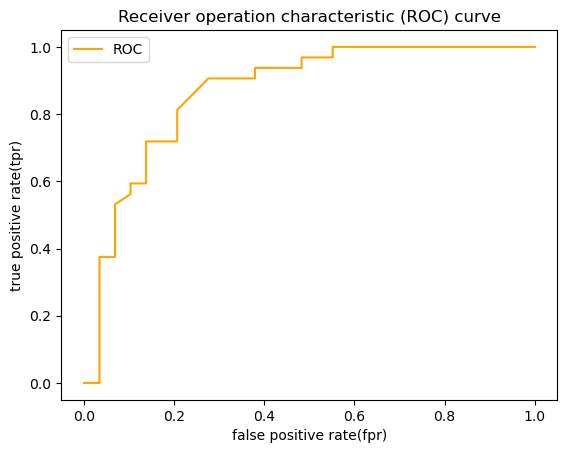

In [118]:
#create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    
    #plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    #plot line with no predictive power (baseline)
   # plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    #customize the plot
    plt.xlabel("false positive rate(fpr)")
    plt.ylabel("true positive rate(tpr)")
    plt.title("Receiver operation characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [119]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

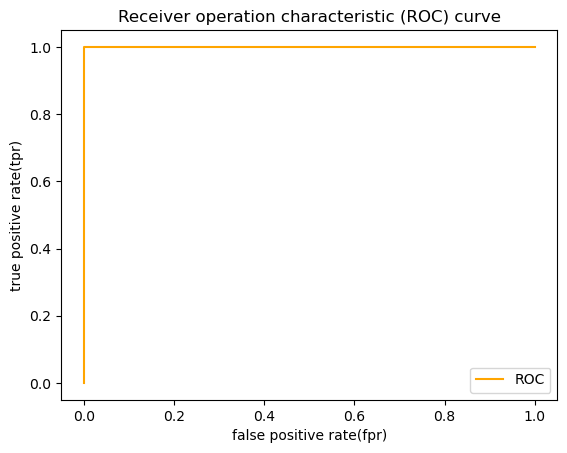

In [120]:
#plot perfect ROC curve and AUC score

fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [121]:
#perfect AUC score
roc_auc_score(y_test,y_test)

1.0

# 3.confusion matrix

a confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

in essence giving the ides of where the model is getting confused.

In [122]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [123]:
#visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["actual labels"],
            colnames=["predicted labels"])

predicted labels,0,1
actual labels,,
0,23,6
1,6,26


In [124]:
23+6+6+26


61

In [125]:
len(y_test)

61

In [126]:
len(y_test)

61

In [127]:
#how to install a conda package into the current environment from a jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0



# All requested packages already installed.



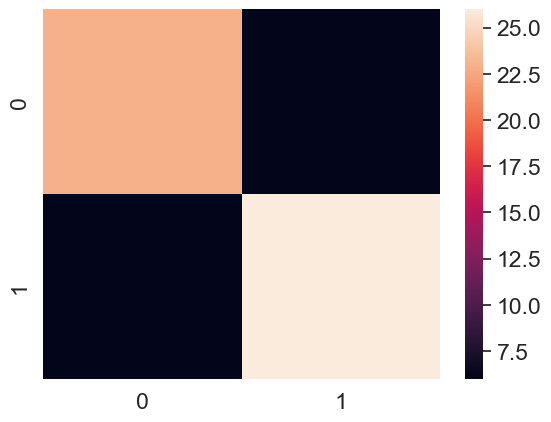

In [128]:
# make our cinfusion matrix more visual with seaborn's heatmap()

import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

#plot it using seaborn
sns.heatmap(conf_mat);

# Main start of confusion matrix

In [129]:
y_preds=clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [130]:
pd.crosstab(y_test,y_preds,
           rownames=["actual label"],
           colnames=["predicted label"])


predicted label,0,1
actual label,,
0,23,6
1,6,26


### creating a confusion matrix using scikit-learn


In [131]:
import sklearn
print(sklearn.__version__)

1.1.3


In [132]:
clf

RandomForestClassifier()

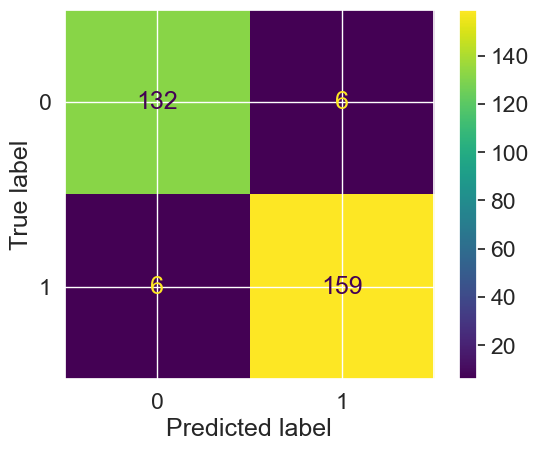

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)

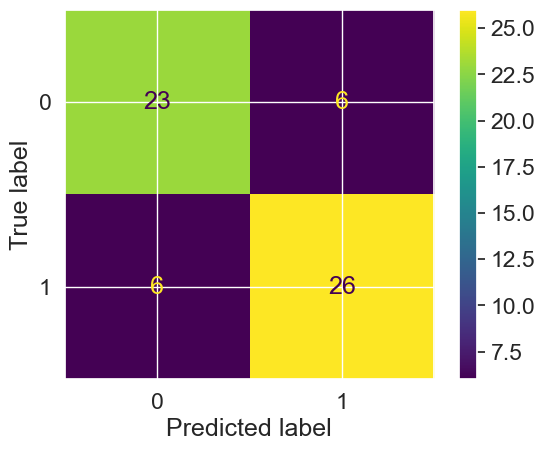

In [134]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)

# classification Report

In [135]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [136]:
# where precision and recall become valuable

disease_true=np.zeros(10000)
disease_true[0]=1 #only one positive case

disease_preds=np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,output_dict=True))

/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics

* accuracy - is a good measure to start with if all classes are balanced

* precision and recall become more important when classes are imbalance

if false positive predictions are worse than false negative, aim for higher precision

if false negative prediction are worse than false positives,aim for higher recell

f1.score is a combination of precision and recell

In [137]:
np.array(disease_true)

array([1., 0., 0., ..., 0., 0., 0.])

### 4.2.2 regression model evaluation metrics

the ones we are going to cover are:
    
    1. R^2 (pronunced r-squared) or coefficient of determination
    2. mean absolute error(MAE)
    3. mean squared error(MSE)
    

# R^2 (pronunced r-squared) or coefficient of determination

In [138]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



model=RandomForestRegressor()
model.fit(x_train,y_train)


RandomForestRegressor()

In [139]:
model.score(x_test,y_test)

0.8066196804802649

In [140]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [141]:
y_test.mean()

2.0550030959302323

In [142]:
from sklearn.metrics import r2_score


# Fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [143]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [144]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [145]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

# Mean absolute error(MAE)


MAE is the average of the absolute differences between predictions and actual values
it gives you an idea of how wrong your models predictions are.

In [146]:
# from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae



0.3265721842781009

In [147]:
df=pd.DataFrame(data={"actual data": y_test,
                      "predicted data": y_preds})
df["differences"]=df["predicted data"]-df["actual data"]
df.head(20)

,actual data,predicted data,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [148]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [149]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [150]:
df["differences"].mean()

0.0121069218749996

In [151]:
#MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

#  mean squared error(MSE)

MSE is the mean of the square of the errors between actual and predicted values.


In [152]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.2534073069137548

In [153]:
df["squared values"]=df["differences"]*df["differences"] #or np.squared(df["differences"])
df.head(10)

,actual data,predicted data,differences,squared values
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
13311,1.58700,1.654970,0.067970,0.004620
7113,1.98200,2.343230,0.361230,0.130487
7668,1.57500,1.661820,0.086820,0.007538
18246,3.40000,2.474890,-0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.135776


In [154]:
#calculate MSE by hand

squared=np.square(df["differences"])
squared.mean()

0.2534073069137548

In [155]:
df.iloc[0]

actual data       0.477000
predicted data    0.493840
differences       0.016840
squared values    0.000284
Name: 20046, dtype: float64

In [156]:
#making the duplicate of df

df_large_error=df.copy()


In [157]:
df_large_error.iloc[0]["squared values"]=16

In [158]:
df_large_error.head()

,actual data,predicted data,differences,squared values
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [159]:
# calculate MSE with large error
df_large_error["squared values"].mean()

0.25728320720794084

In [160]:

df_large_error.iloc[1:100,3]=20 #,3 is used to change the values in the 3rd column
df_large_error

,actual data,predicted data,differences,squared values
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,20.000000
15663,5.00001,4.928596,-0.071414,20.000000
20484,2.18600,2.540290,0.354290,20.000000
9814,2.78000,2.331760,-0.448240,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [161]:
df_large_error["squared values"].mean()

0.7333540351264799

# 4.2.3 finally using the scoring parameter

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()

In [163]:
np.random.seed(42)
#cross validation accuracy
cv_acc=cross_val_score(clf,x,y,cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [164]:
# cross validated accuracy
print(f"the cross validated accuracy is :{np.mean(cv_acc)*100:.2f}%")

the cross validated accuracy is :82.48%


In [165]:
np.random.seed(42)

cv_acc=cross_val_score(clf,x,y,cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [166]:
# cross validated accuracy
print(f"the cross validated accuracy is :{np.mean(cv_acc)*100:.2f}%")

the cross validated accuracy is :82.48%


In [167]:
##precision
np.random.seed(42)

cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [168]:
# cross validated precision
print(f"the cross validated precision is :{np.mean(cv_precision)}")

the cross validated precision is :0.8329547346025924


In [169]:
#recall
np.random.seed(42)

cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [170]:
# cross validated recall
print(f"the cross validated recall is :{np.mean(cv_recall)}")

the cross validated recall is :0.8545454545454545


Let's see the 'scoring' parameter being using for a regression problem

In [171]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

model=RandomForestRegressor()

In [172]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [173]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [174]:
#mean squared error
cv_mse=cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4302688111843372

In [175]:
cv_mse

array([-0.52532899, -0.34772023, -0.37442475, -0.43896032, -0.46490977])

In [176]:
#mean absolute error
cv_mae=cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")

In [177]:
cv_mae

array([-0.54518527, -0.41051585, -0.43822943, -0.46672399, -0.47339624])

## 4.3 using different evaluation metrics as scikit-learn functions

the 3rd way to evaluate scikit-learn machine learning models/estimators is to using the 'sklearn.metrics' module
https://scikit-learn.org/stable/modules/model_evaluation.html

In [178]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# create x & y
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split data
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2)

#create model

clf=RandomForestClassifier()

#fit the model
clf.fit(x_train,y_train)

#make predictions

y_preds=clf.predict(x_test)

#evaluate model using evaluation functions
print("classification metrics on the test set")
print(f"accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"precision:{precision_score(y_test,y_preds)*100:.2f}%")
print(f"recall:{recall_score(y_test,y_preds)*100:.2f}%")
print(f"f1:{f1_score(y_test,y_preds)*100:.2f}%")

classification metrics on the test set
accuracy:85.25%
precision:84.85%
recall:87.50%
f1:86.15%


In [179]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x & y
x=housing_df.drop("target",axis=1)
y=housing_df["target"]


#split data
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2)

#create model

model=RandomForestRegressor()

#fit the model
model.fit(x_train,y_train)

#make predictions

y_preds=model.predict(x_test)

#evaluate model using evaluation functions
print("regressor metrics on the test set")
print(f"r2:{r2_score(y_test,y_preds)*100:.2f}%")
print(f"mean absolute error:{mean_absolute_error(y_test,y_preds)*100:.2f}%")
print(f"mean squared error:{mean_squared_error(y_test,y_preds)*100:.2f}%")

regressor metrics on the test set
r2:80.66%
mean absolute error:32.66%
mean squared error:25.34%


 # 5.Improving the model
    
    first predictions=baseline predictions.first model= baseline model.
    
    from a data perspective:
        
        * could we collect more data?(generally, the more data ,the better)
        *could we improve our data?
        
     from a model perspective:
        * is there a better model we could use?
        *could we improve the current model?
        
    hyperparameters vs parameters
    
        * parameters=model find these patterns in data
        * hyperparameters=settings on amodel you can adjust to (potentially) improve its ability to find patterns
        
# three ways to adjust hyperparameters:
1. by hand
2. randomly with randomsearchcv
3. exhaustively with gridsearchcv

In [180]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [181]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 tuning hyperparameters by hand

lets make 3 sets,trainng,validation and test

we are going to try and adjust:

* max_depth
* max_features
* max_leaf_nodes
* n_estimators

In [182]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparision on y_true labels vs y_preds on a classification>
    """
    
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
    print(f"acc:{accuracy*100:.2f}%")
    print(f"precision:{precision:.2f}")
    print(f"recall:{recall:.2f}")
    print(f"f1 score:{f1:.2f}")
    
    return metric_dict
    
                           

In [183]:
# by hand

In [184]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


#split the data

heart_disease_shuffled=heart_disease.sample(frac=1)
heart_disease_shuffled

#split into x and y
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#split the data into train, validation & test sets

train_split=round(0.7*len(heart_disease_shuffled)) #70% of data
valid_split=round(train_split+0.15 * len(heart_disease_shuffled)) #15 % of data
x_train,y_train=x.loc[:train_split], y.loc[:train_split]
x_valid,y_valid=x.loc[train_split:valid_split], y.loc[train_split:valid_split]
x_test,y_test=x.loc[valid_split:],y.loc[valid_split:]

len(x_train),len(x_valid),len(x_test)

clf=RandomForestClassifier()

clf.fit(x_train,y_train)

#make baseline prediction

y_preds=clf.predict(x_valid)

#evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

acc:90.91%
precision:0.88
recall:0.92
f1 score:0.90


{'accuracy': 0.91, 'precision': 0.88, 'recall': 0.92, 'f1': 0.9}

### 5.2 Hyperparameters tuning with randomizedsearchcv

In [185]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split into x and y

x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]


#split data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2)


#instantiate randomforestclassifier

clf=RandomForestClassifier(n_jobs=1)


#set up randomizedsearchcv

rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,#number of models to try
                          cv=5,
                          verbose=2)

#fit the RandomizedSearchCv version of clf

rs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, expli

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, ma

/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.6s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [186]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [187]:
#make prediction with the best hyperparameters
rs_y_preds=rs_clf.predict(x_test)

#evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

acc:81.97%
precision:0.77
recall:0.86
f1 score:0.81


## 5.3 hyper parameters tuning with gridsearchcv

In [188]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [189]:
# reducing the data by using the information of the above 'rs_clf.best_params_'
grid_2={'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
                 'max_features': ['auto', 'sqrt'],
             'min_samples_split': [ 6],
         'min_samples_leaf': [1, 2]}  

In [190]:
3*1*2*1*2*5

60

In [191]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

#split into x and y

x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]


#split data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2)


#instantiate randomforestclassifier

clf=RandomForestClassifier(n_jobs=1)


#set up gridsearchcv

gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)

#fit the RandomizedSearchCv version of clf

gs_clf.fit(x_train,y_train);



Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None,

In [192]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [193]:
gs_y_preds=gs_clf.predict(x_test)

#evaluate the prediction

gs_metrics=evaluate_preds(y_test,gs_y_preds)

acc:78.69%
precision:0.74
recall:0.82
f1 score:0.78


# lets compare our different models metrics

<AxesSubplot: >

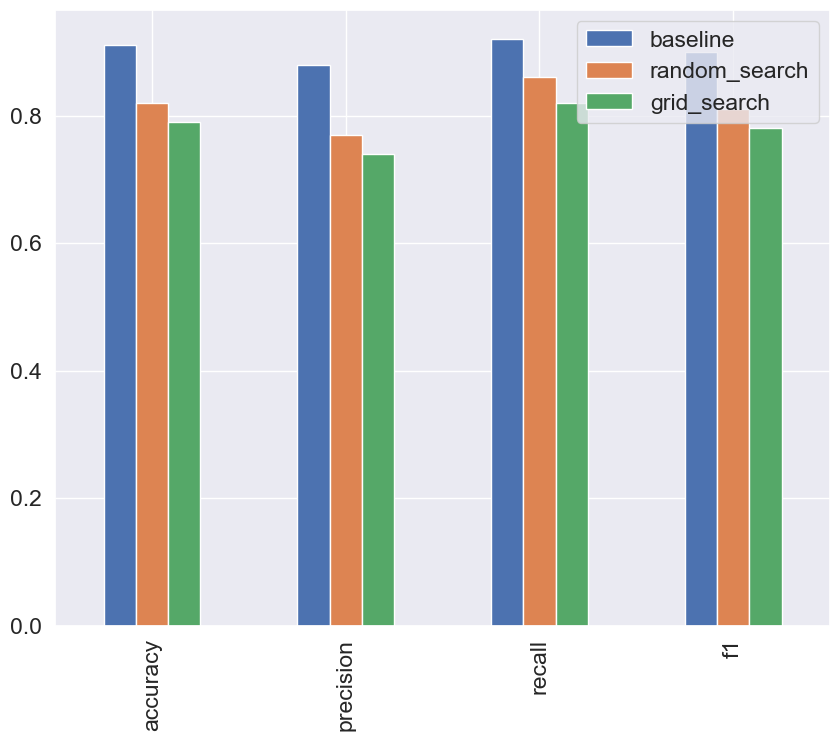

In [194]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,#cant able to find "clf_2":clf_2_metrics"
                              "random_search":rs_metrics,
                              "grid_search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))
#The plot contains the 4 bars each but i can't able to find the clf_2_metrics so its 3 bars 

# saving and loading training machine learning models

two ways to save and load machine learning model :
  1. with python's 'pickle' module
  2. with the 'joblib' module
    


In [195]:
## 1. with python's 'pickle' module

import pickle

#save an extisting model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pk", "wb"))

In [199]:
#load a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pk","rb"))


In [200]:
#make some predictions
pickle_y_preds=loaded_pickle_model.predict(x_test)

evaluate_preds(y_test,pickle_y_preds)

acc:78.69%
precision:0.74
recall:0.82
f1 score:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 2.with the 'joblib' module

In [201]:
from joblib import dump,load

#save model to file

dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [202]:
#import a saved joblib model

loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [203]:
# make some evaluation joblib predictions

joblib_y_preds=loaded_joblib_model.predict(x_test)

evaluate_preds(y_test,joblib_y_preds)

acc:78.69%
precision:0.74
recall:0.82
f1 score:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. putting it all together

In [204]:
data=pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [205]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [206]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we wants to to (all in one cell):
    
    1. fill missing data
    2. convert data to number
    3. build a model on the data

In [207]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#setup random seed
import numpy as np
np.random.seed(42)

#import data and drop the missing rows

data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True) #removing the empty price labels

#define different features and transformer pipeline

categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
     ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
      ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_features=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
     ("imputer",SimpleImputer(strategy="mean"))
])

#setup preprocessing steps (fill missing values,then convert to numbers)
preprocessor=ColumnTransformer(
                    transformers=[
                        ("cat",categorical_transformer,categorical_features),
                        ("door",door_transformer,door_features),
                        ("num",numeric_transformer,numeric_features)
                    ])

#creating a preprocessing and modelling pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),
                      ("model",RandomForestRegressor())])

#split the data
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2)

#fit and score the model

model.fit(x_train,y_train)
model.score(x_test,y_test)


0.22188417408787875

In [208]:
data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

it is possible to use GridSearchCV or RandomizedSearchCV with our pipeline

In [209]:
# use gridsearchcv with our regression pipeline

from sklearn.model_selection import GridSearchCV

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.5s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.6s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.5s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.5s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.6s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.6s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.0s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.6s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.6s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.0s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.0s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.7s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.8s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.7s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.7s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.8s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.2s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.0s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.8s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.0s


/Users/macbookair/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [210]:
gs_model.score(x_test,y_test)

0.3339554263158365